# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
fifa['ValueNumeric'] = fifa.Value.str.replace(r"€",'').str.replace(r".",'').str.replace(r"M",'000000').str.replace(r"K",'000').astype(float)

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. **Create an ANOVA table with value as a function of position and preferred foot**. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [6]:
model = smf.ols("ValueNumeric ~ C(Position) + C(fifa['Preferred Foot'])", data=fifa).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Position),6.010391e+17,26.0,14.783721,1.130359e-64
C(fifa['Preferred Foot']),4.534255e+15,1.0,2.899748,8.861053e-02
Residual,2.833217e+19,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [7]:
# H0: Las medias de dos o más poblaciones son iguales.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# ValueNumeric & Pos: pValue = 0 ---------------> Se rechaza HO
# ValueNumeric & Preferred Foot: pValue = 0.08 > 0.05 -> Se acepta HO
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Conclussion1 -> La media de ValueNumeric y pos son diferentes.
#                F = 4 (hay diferencia entre las dispersiones)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Conclussion2 -> La media de ValueNumeric y Preferred Foot son iguales.
#                F prox 1 (hay poca diferencia entre las dispersiones)

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [8]:
model = smf.ols("ValueNumeric ~ C(Nationality)", data=fifa).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Nationality),1.237904e+18,163.0,4.94485,2.623448e-83
Residual,2.771118e+19,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [9]:
# H0: Las medias de dos o más poblaciones son iguales.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# ValueNumeric & Position -> pValue = 0 -> Se rechaza H0
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Conclussion1 -> La media de ValueNumeric y Nationality son diferentes.
#                 F = 3 (hay diferencia entre las dispersiones)

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [10]:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [11]:
fifa.dropna(inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [12]:
# Predictor variables
X = sm.add_constant(fifa[['SprintSpeed', 'Stamina']])

# What we want to predict
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     308.7
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          1.54e-132
Time:                        19:17:03   Log-Likelihood:            -3.3884e+05
No. Observations:               17918   AIC:                         6.777e+05
Df Residuals:                   17915   BIC:                         6.777e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.889e+07   1.41e+06    -13.357      0.000   -2.17e+07   -1.61e+07
SprintSpeed  1.569e+05   2.56e+04      6.125      0.000    1.07e+05    2.07e+05
Stamina      3.573e+05   2.36e+04     15.111      0.000    3.11e+05    4.04e+05
==============================================================================
Omnibus:                    27637.598   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19352353.055
Skew:                           9.673   Prob(JB):                         0.00
Kurtosis:                     162.834   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

The R-squared (R2) value ranges from 0 to 1. One defines perfect predictive accuracy.There is no standard guideline to determine the level of predictive acceptance. Henseler (2009) proposed a rule of thumb for acceptable R2 with:

- 0.75 -> substantial acceptance
- 0.50 -> moderate acceptance
- 0.25 -> weak acceptance

In [13]:
#R-squared -> 0.033 -> Weak acceptance (high variation) (low accuracy)

In [14]:
#An F-test in regression compares the fits of different linear models
#The F-test can assess multiple coefficients simultaneously

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [15]:
# Predictor variables
X = sm.add_constant(fifa['Potential'])

# What we want to predict
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4814.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:17:04   Log-Likelihood:            -3.3701e+05
No. Observations:               17918   AIC:                         6.740e+05
Df Residuals:                   17916   BIC:                         6.740e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.007e+08    3.1e+06    -64.667      0.000   -2.07e+08   -1.95e+08
Potential   3.008e+06   4.34e+04     69.385      0.000    2.92e+06    3.09e+06
==============================================================================
Omnibus:                    27965.423   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         24473663.031
Skew:                           9.811   Prob(JB):                         0.00
Kurtosis:                     182.989   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [16]:
#R-squared   -> 0.212 -> Weak acceptance (high variation) (low accuracy)

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

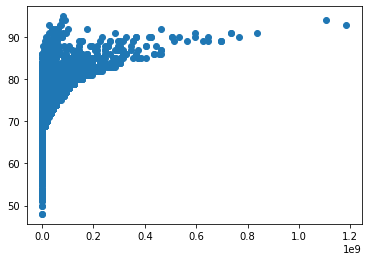

In [18]:
plt.scatter(fifa['ValueNumeric'],fifa['Potential'])